In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Load the diabetes dataset
data = pd.read_csv("train.csv")
#diabetes = datasets.load_diabetes()

In [6]:
# Checking Categorical Data
data.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [7]:
# Checking Numerical Data
data.select_dtypes(include=['int64','float64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [8]:
cat = len(data.select_dtypes(include=['object']).columns)
num = len(data.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', cat, 'categorical', '+',
      num, 'numerical', '=', cat+num, 'features')

Total Features:  43 categorical + 38 numerical = 81 features


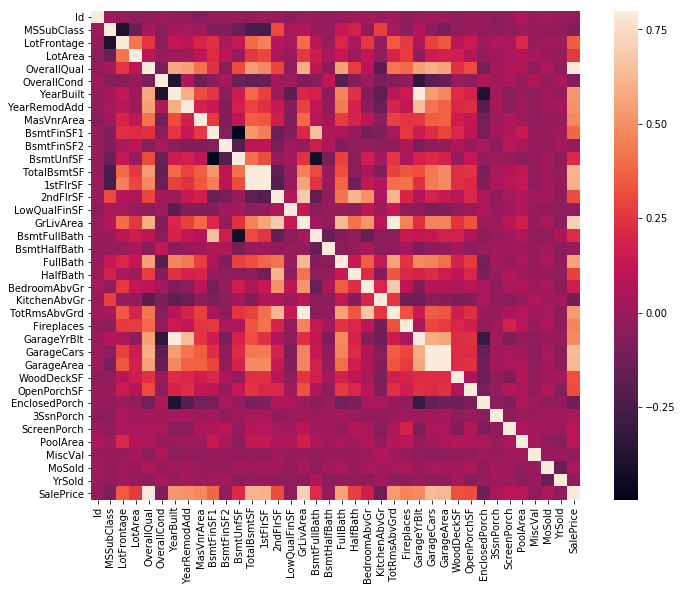

In [11]:
# Correlation Matrix Heatmap
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

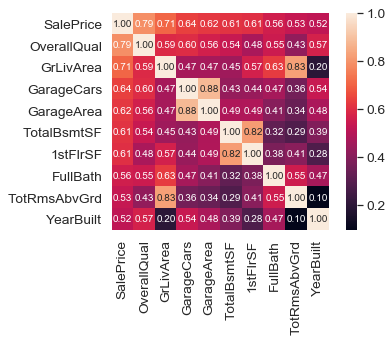

In [13]:
# Top 10 Heatmap
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [14]:
X = data[["LotArea", "OverallCond", "FullBath"]]
y = data["SalePrice"].values.reshape(-1, 1)
print(X.shape, y.shape)
print(X)

(1460, 3) (1460, 1)
      LotArea  OverallCond  FullBath
0        8450            5         2
1        9600            8         2
2       11250            5         2
3        9550            5         1
4       14260            5         2
5       14115            5         1
6       10084            5         2
7       10382            6         2
8        6120            5         2
9        7420            6         1
10      11200            5         1
11      11924            5         3
12      12968            6         1
13      10652            5         2
14      10920            5         1
15       6120            8         1
16      11241            7         1
17      10791            5         2
18      13695            5         1
19       7560            6         1
20      14215            5         3
21       7449            7         1
22       9742            5         2
23       4224            7         1
24       8246            8         1
25      14230     

In [41]:
# The data containes 10 features and 442 samples (This would be 10 housing features, you can choose less)
#X = diabetes.data
#print(X.shape)

# The target values (housing price) for each sample in X
#y = diabetes.target
#print(y.shape)

(442, 10)
(442,)


In [15]:
# Split between the training and the testing dataset

X_train = X[:-20]
X_test = X[-20:]

y_train = y[:-20]
y_test = y[-20:]

In [16]:
# create and fit the model 

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:

# Test accuracy of the model on the test datasets... not great at .538 so you need to refine the model.
model.score(X_test, y_test)

0.5387830635230665

In [20]:
# This would look like y = 3.03*x1 - 2.376 * x2 + 5.105 * x3...
model.coef_

array([[1.56166097e+00, 2.00285850e+03, 7.79115076e+04]])

In [21]:
# predict the cost of the house by inputing values for each feature of the housing situation
model.predict([[1,5,2,3,4,2,5,7,6,1]])


ValueError: shapes (1,10) and (3,1) not aligned: 10 (dim 1) != 3 (dim 0)